# Hydrophobic contacts analysis

SOURCE https://docs.mdanalysis.org/1.0.1/documentation_pages/analysis/contacts.html

## cWza-S355C

### Analyse contacts

In [ ]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt

Define list of hydrophobic residues and work out all their pairwise combinations

In [ ]:
hydrophobic_residues = [
    'ALA',
    'ILE',
    'LEU',
    'MET',
    'PHE',
    'VAL',
    'PRO',
    'GLY',
    'TRP',
    'TYR'
]

from itertools import combinations
residue_combinations = list(combinations(hydrophobic_residues, 2)) +\
                       list(zip(hydrophobic_residues, hydrophobic_residues))

In [ ]:
len(residue_combinations)

Load MD trajectory and its topology

In [ ]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

Analyse all hydrophobic residue pair contacts

In [ ]:
contact_threshold = 4.5 # Angstroms (suggested in MDAnalysis doc)

data = {}
for i in range(len(residue_combinations)):
    residue_pair = residue_combinations[i]
    
    selection1 = "resname "+residue_pair[0]
    selection2 = "resname "+residue_pair[1]
    selection1_first_frame = u.select_atoms(selection1)
    selection2_first_frame = u.select_atoms(selection2)


    contact_analysis = contacts.Contacts(u,
                                         select=(selection1, selection2),
                                         refgroup=(selection1_first_frame, selection2_first_frame), 
                                         sradius=contact_threshold
                                         )
    analysis = contact_analysis.run()
    
    key = '-'.join(residue_combinations[i])
    data[key] = analysis.results['timeseries'].T[1]

Save contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-S355C.json', 'wb') as f:
    pickle.dump(data, f)

### Contacts timeseries

Load contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-S355C.json', 'rb') as f:
    data  = pickle.load(f)

Plot timeseries per residue pairs

In [ ]:
for key in data.keys():
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:

        fig, ax = plt.subplots(figsize=(12,3), dpi=200)

        t_initial = 0
        t_final = 100
        n_frames = 1001
        timeline = np.linspace(t_initial,t_final,n_frames)

        #label = 'model 0050'
        ax.plot(
            timeline,
            data_protein,
            color='black',
            lw=0.5,
            alpha=0.5
        )

        ax.scatter(
            timeline,
            data_protein,
            s=30,
            color='white',
            edgecolor='black',
            marker='o',
            #label=label,
            lw=1,
            alpha=0.75
        )

        #ax.legend(loc='lower right')
        ax.set_xlim(0, 100)
        ax.set_xlabel("time (ns)",fontsize=17)
        ax.set_ylabel("Contacts fraction",fontsize=17)
        ax.set_title(key,fontsize=20)
        ax.set_ylim(0,1)
        ax.grid(True)
        fig.tight_layout()

        plt.show()

### Timeseries Analysis

In [ ]:
residue_pairs = []
std_data = []

for key in data.keys():
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:
        m, s = np.mean(data_protein), np.std(data_protein)
        residue_pairs.append(key)
        std_data.append(s)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4), dpi=150)

value_cutoff = 0.05

ax.plot(std_data, 
        color="black", 
        marker="o",
        lw=1)

ax.plot(range(len(std_data)), 
        len(std_data)*[value_cutoff], 
        color="red", 
        linestyle="--", 
        lw=1.5)

ax.set_xticks(range(len(std_data)))
ax.set_xticklabels(residue_pairs, rotation=90)
ax.set_xlim(0, len(std_data))
ax.set_ylim(0,max(std_data)+0.05)
fig.tight_layout()

plt.show()

In [ ]:
value_cutoff = 0.05
for i in range(len(std_data)):
    if std_data[i] > value_cutoff:
        print(residue_pairs[i], std_data[i])
        
        key = residue_pairs[i]
        data_protein = np.array(data[key])
        data_protein[np.isnan(data_protein)] = 0
        if sum(data_protein) > 0:

            fig, ax = plt.subplots(figsize=(12,3), dpi=200)

            t_initial = 0
            t_final = 100
            n_frames = 1001
            timeline = np.linspace(t_initial,t_final,n_frames)

            #label = 'model 0050'
            ax.plot(
                timeline,
                data_protein,
                color='black',
                lw=0.5,
                alpha=0.5
            )

            ax.scatter(
                timeline,
                data_protein,
                s=30,
                color='white',
                edgecolor='black',
                marker='o',
                #label=label,
                lw=1,
                alpha=0.75
            )

            #ax.legend(loc='lower right')
            ax.set_xlim(0, 100)
            ax.set_xlabel("time (ns)",fontsize=17)
            ax.set_ylabel("Contacts fraction",fontsize=17)
            ax.set_title(key,fontsize=20)
            ax.set_ylim(0,1)
            ax.grid(True)
            fig.tight_layout()

            plt.show()

### Refined contacts analysis

In [ ]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt

Define list of hydrophobic residues and work out all their pairwise combinations

In [ ]:
residue_combinations = [(1,6), (15, 19), (17, 19), (6, 10), (27, 29), (19, 23), (2, 6)]
resnames_combinations = ['ALA-TRP', 'PRO-GLY', 'ILE-GLY', 'TRP-ILE', 'VAL-TYR', 'GLY-LEU', 'PRO-TRP']

Load MD trajectory and its topology

In [ ]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

Analyse all hydrophobic residue pair contacts

In [ ]:
contact_threshold = 4.5 # Angstroms (suggested in MDAnalysis doc)

data = {}
for i in range(len(residue_combinations)):
    residue_pair = residue_combinations[i]
    
    selection1 = "resid "+str(residue_pair[0])
    selection2 = "resid "+str(residue_pair[1])
    selection1_first_frame = u.select_atoms(selection1)
    selection2_first_frame = u.select_atoms(selection2)


    contact_analysis = contacts.Contacts(u,
                                         select=(selection1, selection2),
                                         refgroup=(selection1_first_frame, selection2_first_frame), 
                                         sradius=contact_threshold
                                         )
    analysis = contact_analysis.run()
    
    key = '-'.join(map(str, residue_combinations[i]))
    data[key] = analysis.results['timeseries'].T[1]

Save contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-S355C_refined.json', 'wb') as f:
    pickle.dump(data, f)

Load contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-S355C_refined.json', 'rb') as f:
    data  = pickle.load(f)

Plot timeseries per residue pairs

In [ ]:
for i in range(len(data.keys())):
    key = list(data.keys())[i]
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:

        fig, ax = plt.subplots(figsize=(12,3), dpi=200)

        t_initial = 0
        t_final = 100
        n_frames = 1001
        timeline = np.linspace(t_initial,t_final,n_frames)

        #label = 'model 0050'
        ax.plot(
            timeline,
            data_protein,
            color='black',
            lw=0.5,
            alpha=0.5
        )

        ax.scatter(
            timeline,
            data_protein,
            s=30,
            color='white',
            edgecolor='black',
            marker='o',
            #label=label,
            lw=1,
            alpha=0.75
        )

        #ax.legend(loc='lower right')
        ax.set_xlim(0, 100)
        ax.set_xlabel("time (ns)",fontsize=17)
        ax.set_ylabel("Contacts fraction",fontsize=17)
        ax.set_title(key + ' / ' + resnames_combinations[i],fontsize=20)
        ax.set_ylim(-0.1,1.1)
        ax.grid(True)
        fig.tight_layout()

plt.show()

### Visualise identified contacts

Load 
`data/cWza-S355C_conformation1_0050/refined_hydrophobic_contacts.vmd`

## cWza-Y373C

### Analyse contacts

In [ ]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt

Define list of hydrophobic residues and work out all their pairwise combinations

In [ ]:
hydrophobic_residues = [
    'ALA',
    'ILE',
    'LEU',
    'MET',
    'PHE',
    'VAL',
    'PRO',
    'GLY',
    'TRP',
    'TYR'
]

from itertools import combinations
residue_combinations = list(combinations(hydrophobic_residues, 2)) +\
                       list(zip(hydrophobic_residues, hydrophobic_residues))

Load MD trajectory and its topology

In [ ]:
workdir = "data/cWza-Y373C_conformation1_0337/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

Analyse all hydrophobic residue pair contacts (< 1min)

In [ ]:
contact_threshold = 4.5 # Angstroms (suggested in MDAnalysis doc)

data = {}
for i in range(len(residue_combinations)):
    residue_pair = residue_combinations[i]
    
    selection1 = "resname "+residue_pair[0]
    selection2 = "resname "+residue_pair[1]
    selection1_first_frame = u.select_atoms(selection1)
    selection2_first_frame = u.select_atoms(selection2)


    contact_analysis = contacts.Contacts(u,
                                         select=(selection1, selection2),
                                         refgroup=(selection1_first_frame, selection2_first_frame), 
                                         sradius=contact_threshold
                                         )
    analysis = contact_analysis.run()
    
    key = '-'.join(residue_combinations[i])
    data[key] = analysis.results['timeseries'].T[1]

Save contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-Y373C.json', 'wb') as f:
    pickle.dump(data, f)

### Contacts timeseries

Load contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-Y373C.json', 'rb') as f:
    data  = pickle.load(f)

Plot timeseries per residue pairs

In [ ]:
for key in data.keys():
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:

        fig, ax = plt.subplots(figsize=(12,3), dpi=200)

        t_initial = 0
        t_final = 100
        n_frames = 1001
        timeline = np.linspace(t_initial,t_final,n_frames)

        #label = 'model 0050'
        ax.plot(
            timeline,
            data_protein,
            color='black',
            lw=0.5,
            alpha=0.5
        )

        ax.scatter(
            timeline,
            data_protein,
            s=30,
            color='white',
            edgecolor='black',
            marker='o',
            #label=label,
            lw=1,
            alpha=0.75
        )

        #ax.legend(loc='lower right')
        ax.set_xlim(0, 100)
        ax.set_xlabel("time (ns)",fontsize=17)
        ax.set_ylabel("Contacts fraction",fontsize=17)
        ax.set_title(key,fontsize=20)
        ax.set_ylim(0,1)
        ax.grid(True)
        fig.tight_layout()

        plt.show()

### Timeseries Analysis

In [ ]:
residue_pairs = []
std_data = []

for key in data.keys():
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:
        m, s = np.mean(data_protein), np.std(data_protein)
        residue_pairs.append(key)
        std_data.append(s)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4), dpi=150)

value_cutoff = 0.05

ax.plot(std_data, 
        color="black", 
        marker="o",
        lw=1)

ax.plot(range(len(std_data)), 
        len(std_data)*[value_cutoff], 
        color="red", 
        linestyle="--", 
        lw=1.5)

ax.set_xticks(range(len(std_data)))
ax.set_xticklabels(residue_pairs, rotation=90)
ax.set_xlim(0, len(std_data))
ax.set_ylim(0,max(std_data)+0.05)
ax.set_ylim(0,0.5+0.05)
fig.tight_layout()

plt.show()

In [ ]:
value_cutoff = 0.05
for i in range(len(std_data)):
    if std_data[i] > value_cutoff:
        print(residue_pairs[i], std_data[i])
        
        key = residue_pairs[i]
        data_protein = np.array(data[key])
        data_protein[np.isnan(data_protein)] = 0
        if sum(data_protein) > 0:

            fig, ax = plt.subplots(figsize=(12,3), dpi=200)

            t_initial = 0
            t_final = 100
            n_frames = 1001
            timeline = np.linspace(t_initial,t_final,n_frames)

            #label = 'model 0050'
            ax.plot(
                timeline,
                data_protein,
                color='black',
                lw=0.5,
                alpha=0.5
            )

            ax.scatter(
                timeline,
                data_protein,
                s=30,
                color='white',
                edgecolor='black',
                marker='o',
                #label=label,
                lw=1,
                alpha=0.75
            )

            #ax.legend(loc='lower right')
            ax.set_xlim(0, 100)
            ax.set_xlabel("time (ns)",fontsize=17)
            ax.set_ylabel("Contacts fraction",fontsize=17)
            ax.set_title(key,fontsize=20)
            ax.set_ylim(0,1)
            ax.grid(True)
            fig.tight_layout()

            plt.show()

### Refined contacts analysis

In [ ]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt

Define list of hydrophobic residues and work out all their pairwise combinations

In [ ]:
residue_combinations = [(1,3), (2,6), (10,15), (15,17), (17,19), (19,23), (4,6), (9,6), (15,19)]
resnames_combinations = ['ALA-LEU', 'PRO-TRP', 'ILE-PRO', 'PRO-ILE', 'ILE-GLY', 'GLY-LEU', 'VAL-TRP', 'VAL-TRP', 'PRO-GLY']

Load MD trajectory and its topology

In [ ]:
workdir = "data/cWza-Y373C_conformation1_0337/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

Analyse all hydrophobic residue pair contacts (< 1min)

In [ ]:
contact_threshold = 4.5 # Angstroms (suggested in MDAnalysis doc)

data = {}
for i in range(len(residue_combinations)):
    residue_pair = residue_combinations[i]
    
    selection1 = "resid "+str(residue_pair[0])
    selection2 = "resid "+str(residue_pair[1])
    selection1_first_frame = u.select_atoms(selection1)
    selection2_first_frame = u.select_atoms(selection2)


    contact_analysis = contacts.Contacts(u,
                                         select=(selection1, selection2),
                                         refgroup=(selection1_first_frame, selection2_first_frame), 
                                         sradius=contact_threshold
                                         )
    analysis = contact_analysis.run()
    
    key = '-'.join(map(str, residue_combinations[i]))
    data[key] = analysis.results['timeseries'].T[1]

Save contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-Y373C_refined.json', 'wb') as f:
    pickle.dump(data, f)

Load contact analysis data

In [ ]:
import pickle
with open('data/hydrophobic_contacts_cWza-Y373C_refined.json', 'rb') as f:
    data  = pickle.load(f)

Plot timeseries per residue pairs

In [ ]:
for i in range(len(data.keys())):
    key = list(data.keys())[i]
    data_protein = np.array(data[key])
    data_protein[np.isnan(data_protein)] = 0
    if sum(data_protein) > 0:

        fig, ax = plt.subplots(figsize=(12,3), dpi=200)

        t_initial = 0
        t_final = 100
        n_frames = 1001
        timeline = np.linspace(t_initial,t_final,n_frames)

        #label = 'model 0050'
        ax.plot(
            timeline,
            data_protein,
            color='black',
            lw=0.5,
            alpha=0.5
        )

        ax.scatter(
            timeline,
            data_protein,
            s=30,
            color='white',
            edgecolor='black',
            marker='o',
            #label=label,
            lw=1,
            alpha=0.75
        )

        #ax.legend(loc='lower right')
        ax.set_xlim(0, 100)
        ax.set_xlabel("time (ns)",fontsize=17)
        ax.set_ylabel("Contacts fraction",fontsize=17)
        ax.set_title(key + ' / ' + resnames_combinations[i],fontsize=20)
        ax.set_ylim(-0.1,1.1)
        ax.grid(True)
        fig.tight_layout()

plt.show()

### Visualise identified contacts

## Comparing contact fluctuations

Load contact analysis data

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('data/hydrophobic_contacts_cWza-S355C.json', 'rb') as f:
    data_cWzaS355C  = pickle.load(f)

In [ ]:
with open('data/hydrophobic_contacts_cWza-Y373C.json', 'rb') as f:
    data_cWzaY373C  = pickle.load(f)

In [ ]:
X = data_cWzaS355C
contacts_fluctuations_cWzaS355C = {key: np.std(X[key]) for key in X.keys() if not np.isnan(X[key][0])}

X = data_cWzaY373C
contacts_fluctuations_cWzaY373C = {key: np.std(X[key]) for key in X.keys() if not np.isnan(X[key][0])}

In [ ]:
len(contacts_fluctuations_cWzaY373C.keys()), len(contacts_fluctuations_cWzaS355C.keys())

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(12,5), dpi=200)

color = 'green'

X = contacts_fluctuations_cWzaS355C
x, y = range(len(X.keys())), X.values()
ax1.plot(x, y, color=color, lw=1, alpha=0.5)
ax1.scatter(x, y, color='white', edgecolor=color,lw=1, alpha=1)

ax1.set_xticks(x)
x_labels = list(X.keys())
ax1.set_xticklabels(x_labels, rotation=45)
ax1.set_xlim(0,len(x_labels))
ax1.plot((0,len(x_labels)),(0.1,0.1),color='red',linestyle='--',lw=1.5)

X = contacts_fluctuations_cWzaY373C
x,y = range(len(X.keys())), X.values()
ax2.plot(x, y, color=color, lw=1, alpha=0.5)
ax2.scatter(x, y, color='white', edgecolor=color,lw=1, alpha=1)

ax2.set_xticks(x)
x_labels = list(X.keys())
ax2.set_xticklabels(x_labels, rotation=45)
ax2.set_xlim(0,len(x_labels))
ax2.plot((0,len(x_labels)),(0.1,0.1),color='red',linestyle='--',lw=1.5)

ax1.set_ylim(0,0.6)
ax2.set_ylim(0,0.6)
ax1.grid(True)
ax2.grid(True)
ax1.set_title('cWza-S355C')
ax2.set_title('cWza-Y373C')

ax1.set_ylabel("$STD$ (Contacts fraction)")
ax2.set_ylabel("$STD$ (Contacts fraction)")

fig.tight_layout()
plt.show()

From the above data, it becomes clear that for each mutant the most fluctuating contacts are

* For `cWza-S355C`: ALA-TRP, ILE-GLY, ILE-TRP, LEU-GLY, VAL-TYR, PRO-GLY (6 residue pairs)
* For `cWza-Y373C`: ILE-PRO, LEU-GLY, PRO-GLY (3 residue pairs)

CONCLUSION: The mutant that undergoes confomrational transition features more largely fluctuating hydrophobic contacts (~ 10%) than the mutant displaying a stable conformation. 

# All contacts analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
import matplotlib.pyplot as plt
from MDAnalysis.analysis import distances

Load MD trajectory and its topology

In [ ]:
workdir = "data/cWza-S355C_conformation1_0050/"
u = mda.Universe(workdir+'md_100ns.tpr', workdir+'md_100ns.xtc',in_memory=True)

Distances between residues

In [ ]:
p1 = u.select_atoms('protein')
p2 = u.select_atoms('protein')
p1_com = p1.center_of_mass(compound='residues')
p2_com = p2.center_of_mass(compound='residues')

n_p1 = len(p1_com)
n_p2 = len(p2_com)

print('p1 has {} residues and p2 has {} residues'.format(n_p1, n_p2))

In [ ]:
res_dist = distances.distance_array(p1_com, p2_com,
                                    box=u.dimensions)

In [ ]:
res_dist_masked =np.ma.masked_where(res_dist > 4.5, res_dist)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,20),dpi=150)
im2 = ax.imshow(res_dist_masked, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax.set_yticks(np.arange(n_p1)[::tick_interval])
ax.set_xticks(np.arange(n_p2)[::tick_interval])
ax.set_yticklabels(p1.residues.resids[::tick_interval])
ax.set_xticklabels(p2.residues.resids[::tick_interval])

# add figure labels and titles
ax.set_ylabel('Residues')
ax.set_xlabel('Residues')
ax.set_title('Distance between center-of-mass')

In [ ]:
from itertools import combinations
residue_combinations = list(combinations(range(1,257), 2))

In [ ]:
def contacts_within_cutoff(u, group_a, group_b, radius=4.5):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries).T[1]

In [ ]:
contacts_data = {}
for res_pair in residue_combinations:
    res_a, res_b = res_pair
    group_a = u.select_atoms("resid "+str(res_a)+" and not(name H* or backbone)")
    group_b = u.select_atoms("resid "+str(res_b)+" and not(name H* or backbone)")
    timeseries = contacts_within_cutoff(u, group_a, group_b, radius=4.5)
    if timeseries.sum() > 0:
        contacts_data[res_pair] = timeseries

In [ ]:
import pickle

with open("data/contacts_data_cWza-S355C.pkl", "wb") as fp:
    pickle.dump(contacts_data, fp)

## Script

In [ ]:
%%writefile md_contacts_analysis.py
def contacts_within_cutoff(u, group_a, group_b, radius=4.5):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries).T[1]
    
if __name__ == "__main__":
    import os
    import sys
    import pickle
    import coloredlogs, logging
    import argparse
    import numpy as np
    from time import process_time
    import MDAnalysis as mda
    from MDAnalysis.analysis import contacts
    from MDAnalysis.analysis import distances
    from itertools import combinations
    
    # Initilise argparser
    parser = argparse.ArgumentParser(description='This is a demo.')
    parser.add_argument("-p",
                        "--topology",
                        dest="topology_filepath",
                        help="Set topology filepath")
    parser.add_argument("-x",
                        "--trajectory",
                        dest="trajectory_filepath",
                        help="Set trajectory filepath")
    parser.add_argument("-o",
                        "--output",
                        dest="output_filename",
                        help="Set noncovalent contacts analysis output filename")
    parser.add_argument("-v",
                        "--verbose",
                        help="Increase output verbosity",
                        action="store_true")
    
    # Input/Output files
    args = parser.parse_args()
    
    topology_filepath = args.topology_filepath
    trajectory_filepath = args.trajectory_filepath
    output_filename = args.output_filename
    
    # Configure logger
    workdir = os.path.dirname(trajectory_filepath)
    if args.verbose:
        coloredlogs.install(level='DEBUG')
        logging.basicConfig(level=logging.DEBUG)
        logging.basicConfig(filename=os.path.join(workdir,'contacts.log'),
                            filemode='w', 
                            format='%(name)s - %(levelname)s - %(message)s')

    # Load trajectory file along with topology
    tic = process_time() 
    u = mda.Universe(topology_filepath, trajectory_filepath, in_memory=True)
    toc = process_time()
    logging.info('Loaded your trajectory and topology.')
    logging.info('Elapsed time (secs): %s', (toc-tic))

    # Work out residue pair combinations
    n_residues = 32
    n_chains = 8
    residue_combinations = list(combinations(range(1,n_residues*n_chains+1), 2))

    # Loop over all residue combination pairs
    logging.info('Extracting Non-covalent contacts for your input trajectory and topology. Default cut-off = 4.5 (Å).')
    tic_total = process_time() 
    
    contacts_data = {}
    for res_pair in residue_combinations:
        res_a, res_b = res_pair
        # Define groups - select Side-Chain heavy atoms only, exclude Hydrogens
        group_a = u.select_atoms("resid "+str(res_a)+" and not(name H* or backbone)")
        group_b = u.select_atoms("resid "+str(res_b)+" and not(name H* or backbone)")
        timeseries = contacts_within_cutoff(u, group_a, group_b)
        # Ignore null contacts
        if timeseries.sum() > 0:
            contacts_data[res_pair] = timeseries
            
    toc_total = process_time()
    logging.info('Elapsed TOTAL time (mins): %s', (toc_total-tic_total)/60)
    
    #Save the data
    output_filepath = os.path.join(workdir, output_filename)
    with open(output_filepath,'wb') as f:
        pickle.dump(contacts_data, f)
    logging.info('Saved your Non-covalent Contacts Analysis data in %s', output_filepath)

Execution (Performance: 48m per trajectory)

```bash
python md_contacts_analysis.py -v -p data/cWza-S355C_conformation1_0050/md_100ns.tpr -x data/cWza-S355C_conformation1
_0050/md_100ns.xtc -o md_100ns.contacts.pickle 
```

## 2D contacts matrix visualisation

In [ ]:
def myfunc(x):
    if x%32 == 0:
        return 32
    else:
        return x%32

In [ ]:
N_chain = 8
N_residues = 32
frame_initial = 0
frame_final = 1000
contacts_matrix = np.zeros((N_residues, N_residues))

for residue_pair in residue_combinations:
    i,j = residue_pair
    if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
        try:
            n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
            percentage_contacts = n_contacts/(frame_final - frame_initial)

            contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
            contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
        except:
            pass

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

im = ax.imshow(contacts_matrix, origin='upper', cmap="Greys",alpha=0.75)
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

# custom appearance
ax.set_ylabel('Residues')
ax.set_xlabel('Residues')

aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
ax.set_xticks(range(32))
ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
ax.set_xlim(-1,len(aa_labels))

ax.set_yticks(range(32))
ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
ax.set_ylim(-1,len(aa_labels))

plt.show()

## Time-average Intra-chain SC-SC contacts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def myfunc(x):
    if x%32 == 0:
        return 32
    else:
        return x%32

In [ ]:
N_residues = 32
frame_initial = 150
frame_final = 250
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for N_chain in [1, 2, 3, 4]:
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[0][N_chain-1]
    im = ax.imshow(contacts_matrix, origin='upper', cmap="binary",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True, alpha=0.5)
    
for N_chain in [5, 6, 7, 8]:
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[1][N_chain-5]
    im = ax.imshow(contacts_matrix, origin='upper', cmap="binary",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Intra-chain SC-SC contacts, cWza-S355C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
N_residues = 32
frame_initial = 800
frame_final = 900
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for N_chain in [1, 2, 3, 4]:
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[0][N_chain-1]
    im = ax.imshow(contacts_matrix, origin='upper', cmap="binary",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
for N_chain in [5, 6, 7, 8]:
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[1][N_chain-5]
    im = ax.imshow(contacts_matrix, origin='upper', cmap="binary",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Intra-chain SC-SC contacts, cWza-S355C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

Take the difference

In [ ]:
N_residues = 32
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for N_chain in [1, 2, 3, 4]:
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix1[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix1[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(frame_final - frame_initial)

                contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    #######################################
    ax = axes[0][N_chain-1]
    im = ax.imshow(contacts_matrix, origin='upper', cmap="bwr",vmin=-1,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
for N_chain in [5, 6, 7, 8]:
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix1[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix1[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain) and (j//N_residues+1 == N_chain):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    #######################################
    ax = axes[1][N_chain-5]
    im = ax.imshow(contacts_matrix,origin='upper',cmap="bwr",vmin=-1,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(N_chain))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Intra-chain SC-SC contacts, cWza-S355C", fontsize=15)
fig.tight_layout()
plt.show()

# Time-average Inter-chain SC-SC contacts

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
residue_combinations = list(combinations(range(1,257), 2))

In [ ]:
def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

In [ ]:
def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N

## cWza-S355C

In [ ]:
with open("data/contacts_data_cWza-S355C.pkl",'rb') as fp:
    contacts_data = pickle.load(fp)

In [ ]:
n_chains = 8
n_residues_per_chain = 32
n_residues_total = n_residues_per_chain*n_chains
residue_numbers_total = range(1, n_residues_total+1)
chain_pairs = list(zip(range(n_chains),range(1,n_chains))) + [(0, 7)] # There are 8 chains pairs

### Heatmaps

In [ ]:
N_residues = 32
frame_initial = 150
frame_final = 250
p_val = 1
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
        #if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                #contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                
            except:
                pass

    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Reds",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chains "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True, alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
        #if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                #contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                
            except:
                pass

    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Reds",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-S355C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
N_residues = 32
frame_initial = 800
frame_final = 900
p_val = 5
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
        #if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                #contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                
            except:
                pass

    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Blues",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chains "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True, alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
        #if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                #contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                
            except:
                pass

    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Blues",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-S355C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

Take the difference

In [ ]:
N_residues = 32
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'
p_val = 1
fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

contacts_matrix_all = []

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix1[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix1[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                #contacts_matrix1[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix1[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)
                
                contacts_matrix2[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix2[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
#                 contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
#                 contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    contacts_matrix_all.append(contacts_matrix)
    #######################################
    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="seismic_r",vmin=-1, vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix1[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix1[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (get_original_chain(i) == N_chain_a) and (get_original_chain(j) == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix2[get_original_resnum(i)-1, get_original_resnum(j)-1] = percentage_contacts
                contacts_matrix2[get_original_resnum(j)-1, get_original_resnum(i)-1] = percentage_contacts
                #contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                #contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    contacts_matrix_all.append(contacts_matrix)
    #######################################
    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val,origin='upper',cmap="seismic_r",vmin=-1, vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-S355C", fontsize=15)
fig.tight_layout()
plt.show()

Chain-averaged heatmap

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

im = ax.imshow(np.mean(contacts_matrix_all, axis=0),
               origin='upper',
               cmap="seismic_r",
               vmin=-1,
               vmax=1,
               alpha=1)

aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
ax.set_xticks(range(32))
ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
ax.set_xlim(-1,len(aa_labels))

ax.set_yticks(range(32))
ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
ax.set_ylim(-1,len(aa_labels))

ax.grid(True,alpha=0.5)
#fig.colorbar(im)

ax.set_title("Chain averaged inter-chain SC-SC contacts, cWza-S355C", fontsize=15)
fig.tight_layout()
plt.show()

### Time-series map

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

In [ ]:
def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N

In [ ]:
with open("data/contacts_data_cWza-S355C.pkl",'rb') as fp:
    contacts_data = pickle.load(fp)

In [ ]:
mydict1 = {}
for key in contacts_data.keys():
    i, j = key
    key_new = (get_original_resnum(i), get_original_resnum(j))
    try:
        mydict1[key_new].append(contacts_data[key])
    except KeyError:
        mydict1[key_new] = []

In [ ]:
mydict2 = {k:sum(v)/1001 for k,v in mydict1.items() if (len(v)>1)}

In [ ]:
mydict3 = {}
for key in mydict2.keys():
    if any(list(mydict2[key]) > 0.25*np.max(list(mydict2.values()))):
        mydict3[key] = mydict2[key]

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,2),dpi=200)

im = ax.imshow(np.array(list(mydict3.values())), 
               aspect="auto", 
               interpolation='nearest',
               cmap="binary")

model_names = list(mydict3.keys())
ax.set_yticks(range(len(model_names)))
y_labels = model_names
ax.set_yticklabels(y_labels,fontsize=7)
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.yaxis.set_tick_params(labelleft=False, left=False)

ax.set_xlabel("Time")
ax.set_title("cWza-S355C")
plt.show()

## cWza-Y373C

In [ ]:
import pickle

with open("data/contacts_data_cWza-Y373C.pkl",'rb') as fp:
    contacts_data = pickle.load(fp)

In [ ]:
n_chains = 8
n_residues_per_chain = 32
n_residues_total = n_residues_per_chain*n_chains
residue_numbers_total = range(1, n_residues_total+1)
chain_pairs = list(zip(range(n_chains),range(1,n_chains))) + [(0, 7)] # There are 8 chains pairs

### Heatmaps

In [ ]:
N_residues = 32
frame_initial = 150
frame_final = 250
p_val = 1
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Reds",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chains "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True, alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Reds",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-Y373C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
N_residues = 32
frame_initial = 800
frame_final = 900
p_val = 1
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Blues",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chains "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True, alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    contacts_matrix = np.zeros((N_residues, N_residues))
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass

    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="Blues",vmin=0,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-Y373C: $T \in ["+str(frame_initial/10)+", "+str(frame_final/10)+"]$ ns", fontsize=15)
fig.tight_layout()
plt.show()

Take the difference

In [ ]:
N_residues = 32
sequence = 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT'
p_val = 5

fig,axes = plt.subplots(2,4,figsize=(5*4,5*2),dpi=200)

contacts_matrix_all = []

for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k]
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix1[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix1[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    contacts_matrix_all.append(contacts_matrix)
    #######################################
    ax = axes[0][k]
    im = ax.imshow(contacts_matrix**p_val, origin='upper', cmap="seismic_r",vmin=-1,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
for k in range(4):
    N_chain_a, N_chain_b = chain_pairs[k+4]
    #######################################
    frame_initial = 150
    frame_final = 250
    contacts_matrix1 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix1[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix1[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################        
    frame_initial = 800
    frame_final = 900
    contacts_matrix2 = np.zeros((N_residues, N_residues))
    #######################################
    for residue_pair in residue_combinations:
        i,j = residue_pair
        if (i//N_residues+1 == N_chain_a) and (j//N_residues+1 == N_chain_b):
            try:
                n_contacts = sum(contacts_data[residue_pair][frame_initial: frame_final+1] > 0)
                percentage_contacts = n_contacts/(1+frame_final - frame_initial)

                contacts_matrix2[myfunc(i)-1, myfunc(j)-1] = percentage_contacts
                contacts_matrix2[myfunc(j)-1, myfunc(i)-1] = percentage_contacts
            except:
                pass
    #######################################
    contacts_matrix = contacts_matrix2 - contacts_matrix1
    contacts_matrix_all.append(contacts_matrix)
    #######################################
    ax = axes[1][k]
    im = ax.imshow(contacts_matrix**p_val,origin='upper',cmap="seismic_r",vmin=-1,vmax=1,alpha=1)
    
    # custom appearance
    ax.set_title("Chain "+str(chain_pairs[k+4]))

    aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
    ax.set_xticks(range(32))
    ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
    ax.set_xlim(-1,len(aa_labels))

    ax.set_yticks(range(32))
    ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
    ax.set_ylim(-1,len(aa_labels))
    
    ax.grid(True,alpha=0.5)
    
fig.suptitle("Inter-chain SC-SC contacts, cWza-Y373C", fontsize=15)
fig.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

im = ax.imshow(np.mean(contacts_matrix_all, axis=0),
               origin='upper',
               cmap="seismic_r",
               vmin=-1,
               vmax=1,
               alpha=1)

aa_labels = ['-'.join([aa,str(rn)]) for aa,rn in zip(sequence, range(1,33))]
ax.set_xticks(range(32))
ax.set_xticklabels(aa_labels, rotation=90, fontsize=5)
ax.set_xlim(-1,len(aa_labels))

ax.set_yticks(range(32))
ax.set_yticklabels(aa_labels, rotation=0, fontsize=5)
ax.set_ylim(-1,len(aa_labels))

ax.grid(True,alpha=0.5)
#fig.colorbar(im)

ax.set_title("Chain averaged inter-chain SC-SC contacts, cWza-Y373C", fontsize=15)
fig.tight_layout()
plt.show()

# Dominant contacts
<a id='dominant_contacts'></a>

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N

In [2]:
dirnames = !ls -d data/cWza*_conformation*_[0-9][0-9][0-9][0-9]

In [3]:
NCC_data = {}
for outdir in dirnames:
    model_name = outdir.split('/')[-1]
    
    with open(os.path.join(outdir, "md_100ns.contacts.pickle"),'rb') as fp:
        X = pickle.load(fp)
        
    contacts_data = {k:X[k] for k,v in X.items()}
    
    # Group timeseries for same residue pairs across chains
    contacts_grouped = {}
    for key in contacts_data.keys():
        i, j = key
        key_new = (get_original_resnum(i), get_original_resnum(j))
        try:
            contacts_grouped[key_new].append(contacts_data[key])
        except KeyError:
            contacts_grouped[key_new] = []

    # Sum over all contact timeseries
    contatcs_nonredundant = {k:sum(v) for k,v in contacts_grouped.items() if (len(v)>1)}

    NCC_data[model_name] = contatcs_nonredundant

In [4]:
X = NCC_data
n_frames = 1001

# Average contacts per frame 
df = pd.DataFrame.from_dict({model_name: {respair: np.sum(X[model_name][respair])/n_frames for respair in X[model_name].keys()} for model_name in X.keys()})

df = df.fillna(0)
respairs_sorted = sorted(df.index, key=lambda respair:sum(df.loc[respair]), reverse=True)
df = df.reindex(respairs_sorted)

df.shape

(242, 64)

## Soft filter

In [28]:
# Filtering condition: soft-condition
# Keep residue-pair if there is at least one model whose contacts are above the threshold
threshold = 10
keep_respairs = [any(df.loc[respairs] > threshold) for respairs in df.index]
df_trimmed = df[keep_respairs]

df_trimmed.shape

(65, 64)

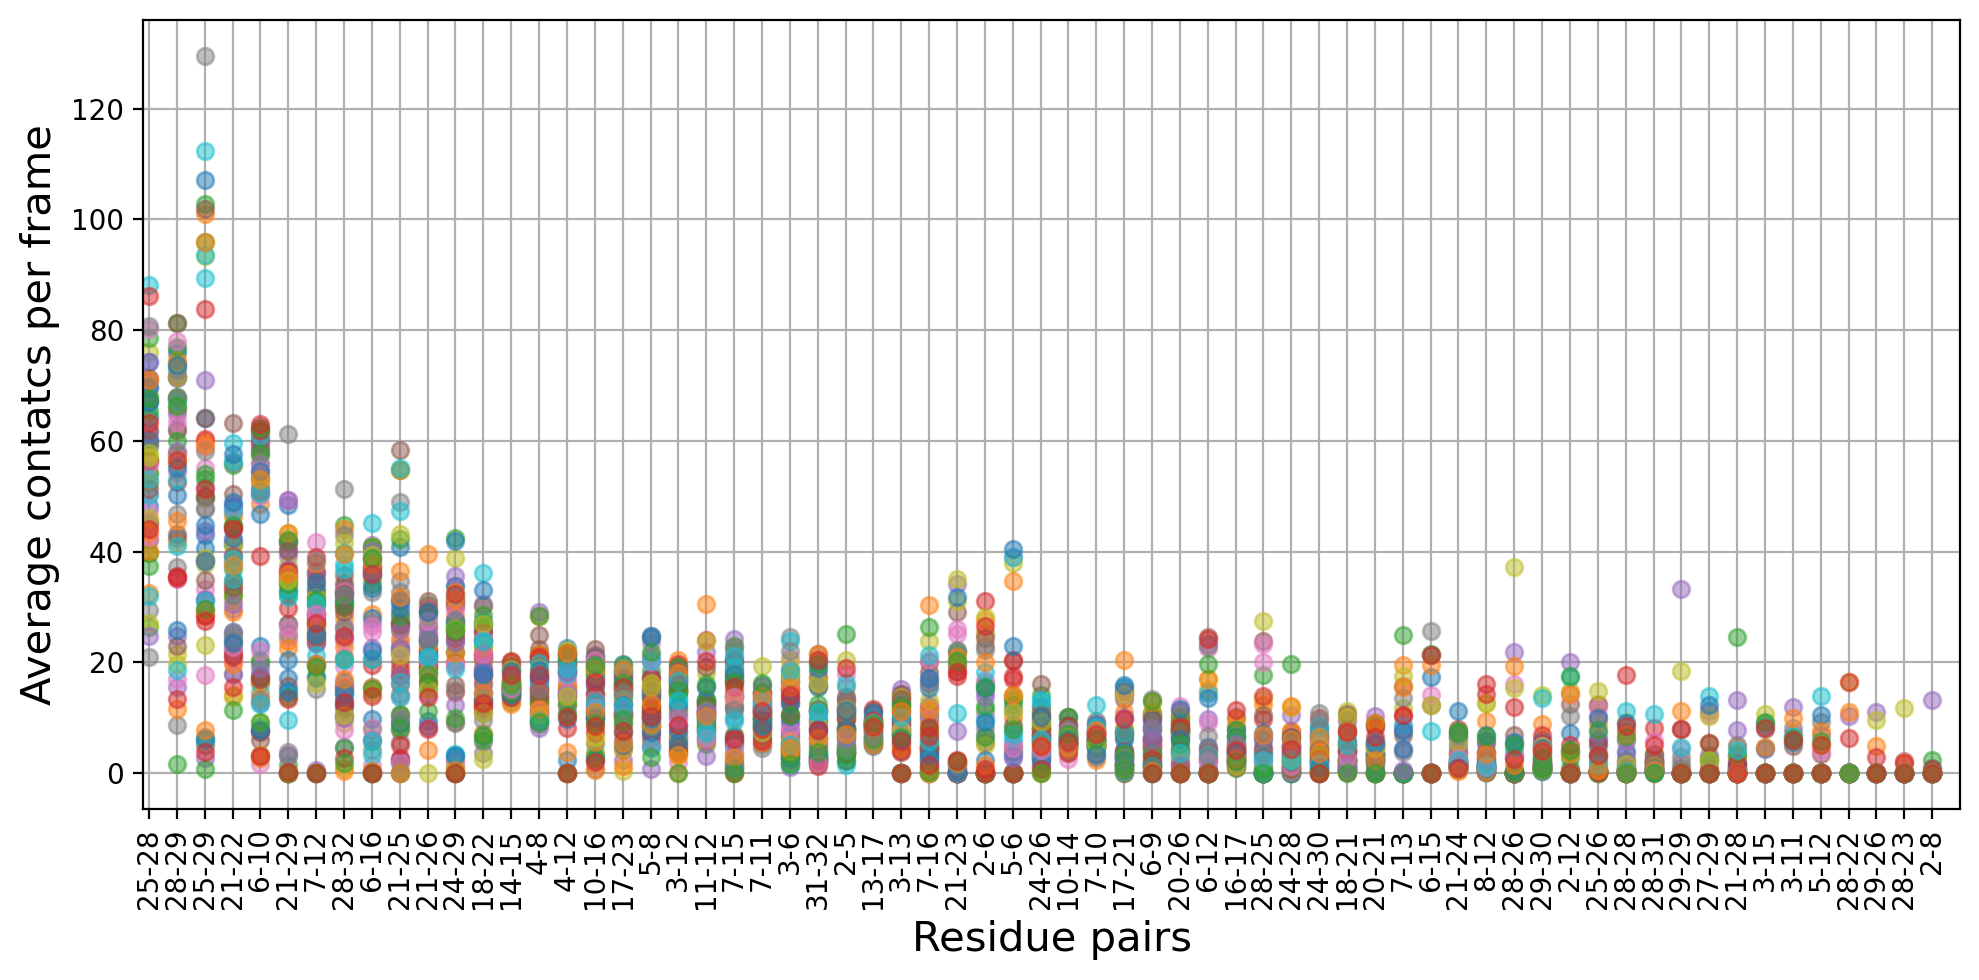

In [29]:
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=200)

df_trimmed.plot(marker='o',linestyle='',alpha=0.5, ax=ax)

ax.set_xticks(range(len(df_trimmed.index)))
respairs_labels = [str(x[0])+'-'+str(x[1]) for x in df_trimmed.index]
ax.set_xticklabels(respairs_labels,fontsize=10,rotation=90)

ax.set_xlim(-0.2,len(df_trimmed.index))
ax.grid(True)
legend = ax.legend()
legend.remove()

ax.set_xlabel('Residue pairs', fontsize=15)
ax.set_ylabel('Average contatcs per frame', fontsize=15)
ax.set_title('')

fig.tight_layout()
plt.show()

## Mild filter

In [5]:
# Filtering condition: mild-condition
# Keep residue-pair if certain fraction of the model's contacts are above the threshold
threshold = 10
fraction = 0.80
keep_respairs = [sum(df.loc[respairs] > threshold)/len(df.columns) >= fraction for respairs in df.index]
df_trimmed = df[keep_respairs]

df_trimmed.shape

(10, 64)

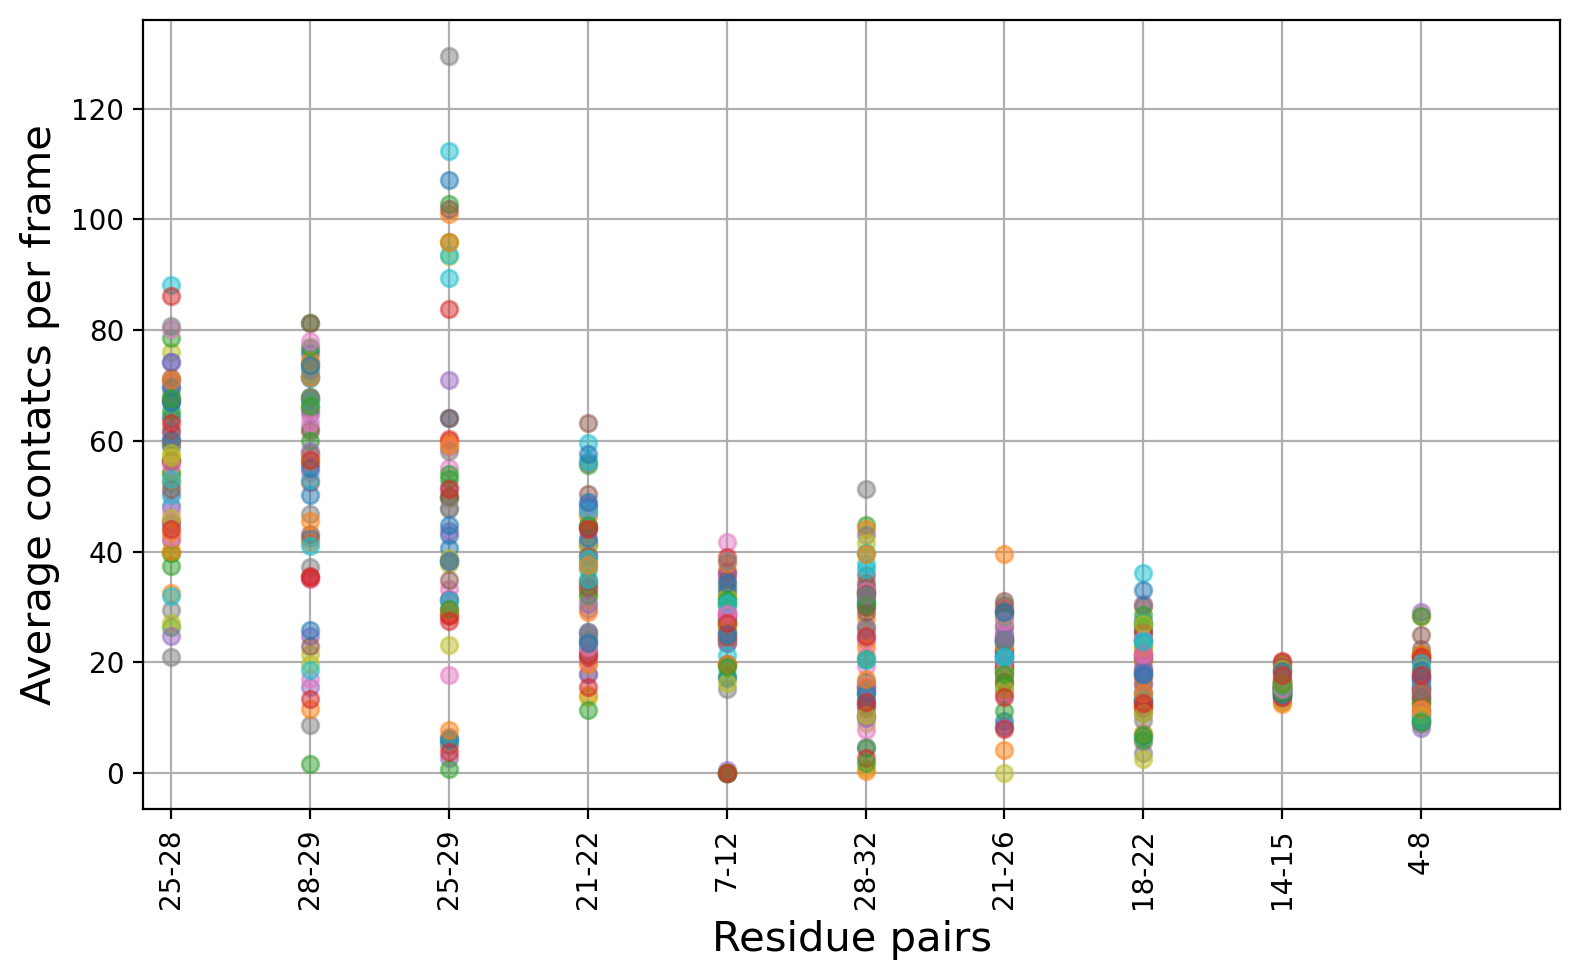

In [6]:
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=200)

df_trimmed.plot(marker='o',linestyle='',alpha=0.5, ax=ax)

ax.set_xticks(range(len(df_trimmed.index)))
respairs_labels = [str(x[0])+'-'+str(x[1]) for x in df_trimmed.index]
ax.set_xticklabels(respairs_labels,fontsize=10,rotation=90)

ax.set_xlim(-0.2,len(df_trimmed.index))
ax.grid(True)
legend = ax.legend()
legend.remove()

ax.set_xlabel('Residue pairs', fontsize=15)
ax.set_ylabel('Average contatcs per frame', fontsize=15)
ax.set_title('')

fig.tight_layout()
plt.show()

In [47]:
list(df_trimmed.index)

[(25, 28),
 (28, 29),
 (25, 29),
 (21, 22),
 (7, 12),
 (28, 32),
 (21, 26),
 (18, 22),
 (14, 15),
 (4, 8)]

## Hard filter

In [18]:
# Filtering condition: hard-condition
# Keep residue-pair if contacts for all models are above the threshold
threshold = 5
keep_respairs = [all(df.loc[respairs] > threshold) for respairs in df.index]
df_trimmed = df[keep_respairs]

df_trimmed.shape

(5, 64)

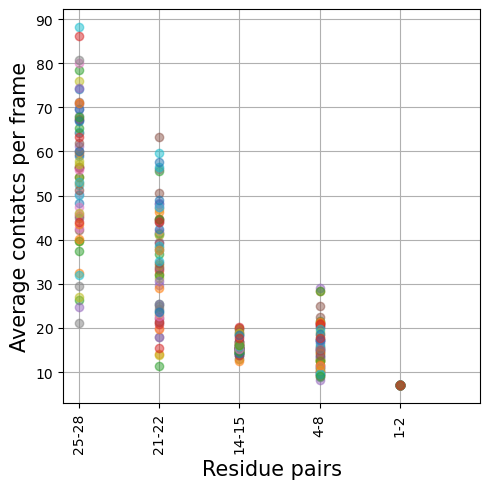

In [21]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=100)

df_trimmed.plot(marker='o',linestyle='',alpha=0.5, ax=ax)

ax.set_xticks(range(len(df_trimmed.index)))
respairs_labels = [str(x[0])+'-'+str(x[1]) for x in df_trimmed.index]
ax.set_xticklabels(respairs_labels,fontsize=10,rotation=90)

ax.set_xlim(-0.2,len(df_trimmed.index))
ax.grid(True)
legend = ax.legend()
legend.remove()

ax.set_xlabel('Residue pairs', fontsize=15)
ax.set_ylabel('Average contatcs per frame', fontsize=15)
ax.set_title('')

fig.tight_layout()
plt.show()

# Visualise contacts data

## Single model: Lead contacts

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N
    
contacts_leading =  [(25, 28),
                     (28, 29),
                     (25, 29),
                     (21, 22),
                     (7, 12),
                     (28, 32),
                     (21, 26),
                     (18, 22),
                     (14, 15),
                     (4, 8)]

In [2]:
workdir = 'data'
#model_name = 'cWza-Y373C_conformation1_0337'
model_name = 'cWza-S355C_conformation1_0050'
filename = 'md_100ns.contacts.pickle'

with open(os.path.join(workdir, model_name, filename),'rb') as fp:
    contacts_data = pickle.load(fp)

In [15]:
# Group timeseries for same residue pairs across chains
contacts_grouped = {}
interchain_counts = {}
intrachain_counts = {}
    
for key in contacts_data.keys():
    i, j = key
    key_new = (get_original_resnum(i), get_original_resnum(j))
    chain_i, chain_j = (get_original_chain(i), get_original_chain(j))
    
    try:
        contacts_grouped[key_new].append(contacts_data[key])
        
    except KeyError:
        contacts_grouped[key_new] = []
     
    if chain_i == chain_j:
        try:
            intrachain_counts[key_new].append(contacts_data[key] > 0)

        except KeyError:
            intrachain_counts[key_new] = []
    elif chain_i != chain_j:
        try:
            interchain_counts[key_new].append(contacts_data[key] > 0)

        except KeyError:
            interchain_counts[key_new] = []

intrachain_frequency = {respair: np.sum(intrachain_counts[respair])/np.sum(np.array(contacts_grouped[respair]) > 0) for respair in intrachain_counts.keys() if len(intrachain_counts[respair]) > 1}
interchain_frequency = {respair: np.sum(interchain_counts[respair])/np.sum(np.array(contacts_grouped[respair]) > 0) for respair in interchain_counts.keys() if len(interchain_counts[respair]) > 1}

# Sum over all contact timeseries per residue combination
n_frames = 1001
contacts_nonredundant = {k:sum(v) for k,v in contacts_grouped.items() if (len(v)>1)}

# Filter out contacts according to leads
contacts_filtered = {}
for respair in contacts_leading:
    if respair in list(contacts_nonredundant.keys()):
        contacts_filtered[respair] = contacts_nonredundant[respair]
    else:
        contacts_filtered[respair] = np.zeros(n_frames)

In [16]:
mutant_sequences = {
    'cWza': '',
    'cWza-K375C': '',
    'cWza-S355C': '',
    'cWza-Y373C': '',
}

In [17]:
counts_data_intrachain = [intrachain_frequency[respair] if respair in intrachain_frequency.keys() else 0.0 for respair in contacts_leading]
counts_data_interchain = [interchain_frequency[respair] if respair in interchain_frequency.keys() else 0.0 for respair in contacts_leading]

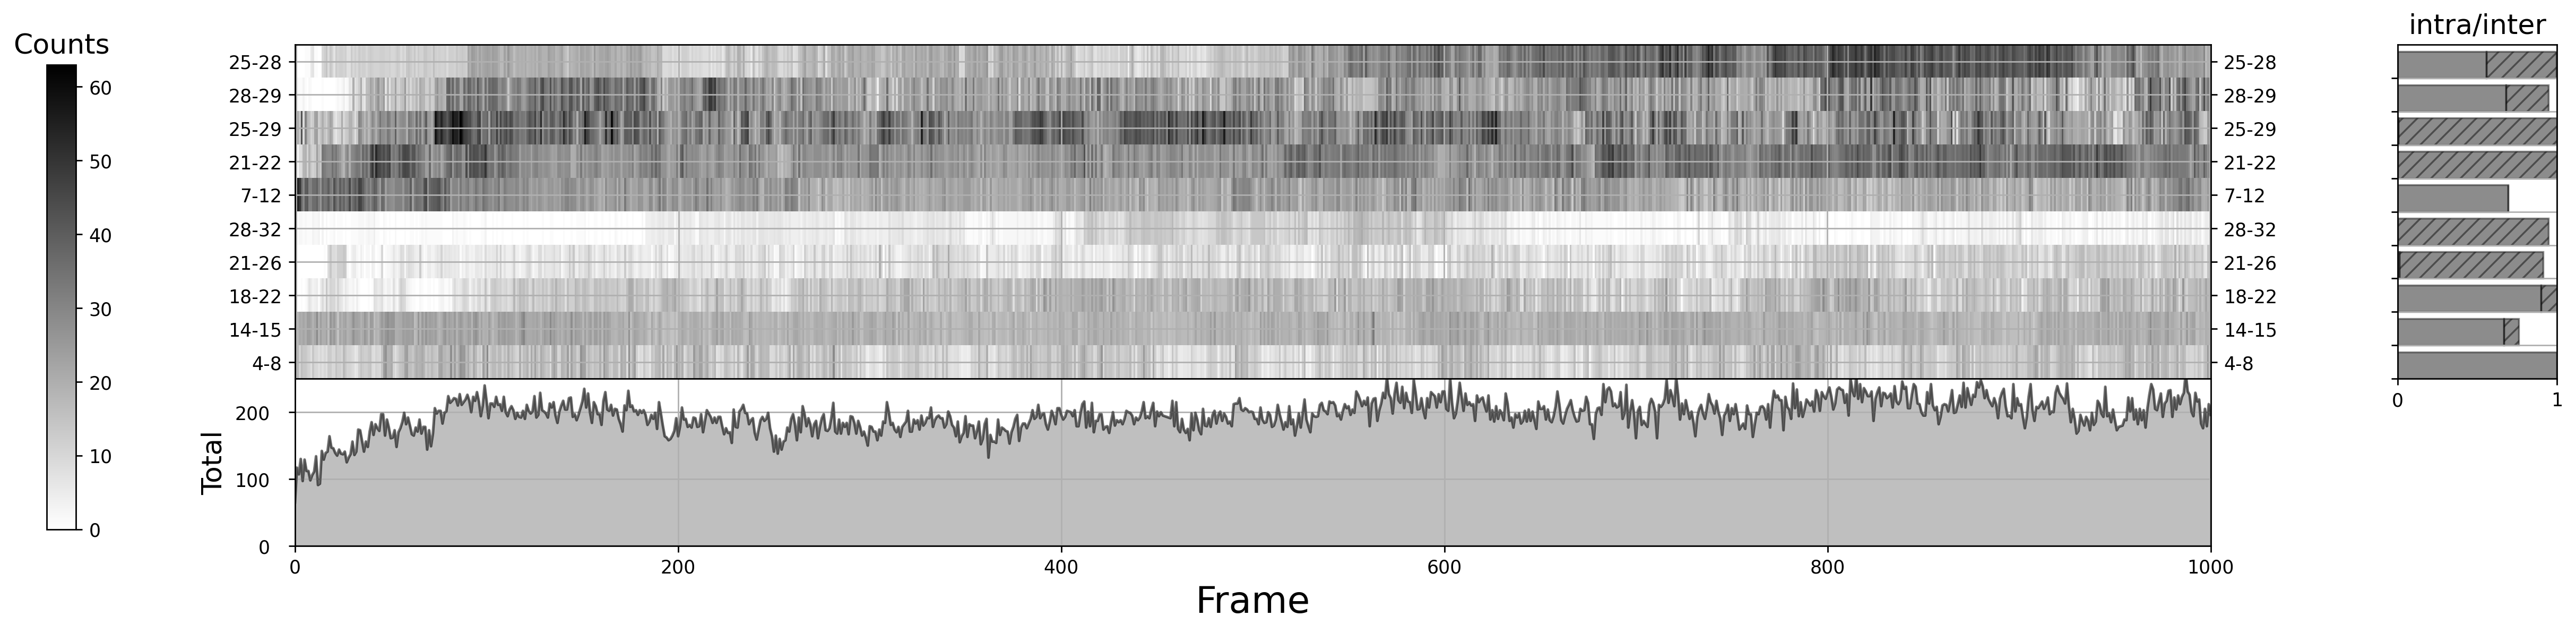

In [18]:
X = contacts_filtered
data_matrix = np.array(list(X.values()))

fig = plt.figure(figsize=(22,5), dpi=250)
gs = fig.add_gridspec(2, 2, width_ratios=[12,1], height_ratios = [2,1])
axes = (plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[1,0]))

# Heatmap
ax = axes[0]
im = ax.imshow(data_matrix, 
               origin='upper', 
               vmin = 0,
               vmax = data_matrix.max(),
               interpolation='nearest',
               aspect='auto',
               cmap="binary",
               alpha=1)

# customise colorbar
cbar_ax = fig.add_axes([0.04, 0.15, 0.01, 0.7])
plt.colorbar(im, cax=cbar_ax, shrink=0.01)

# customise axes and tick labels
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.set_xticklabels([])
ax.set_yticks(range(len(contacts_leading)))
y_labels = [str(x[0])+'-'+str(x[1]) for x in contacts_leading]
ax.set_yticklabels(y_labels,fontsize=10)
ax.grid("True")

# Barplots
ax = axes[1]
ax.barh(range(len(contacts_filtered)), 
        counts_data_intrachain, 
        color='black', 
        align='edge', 
        alpha=0.45, 
        edgecolor='black')

ax.barh(range(len(contacts_filtered)), 
        counts_data_interchain, 
        left = counts_data_intrachain, 
        color='black', 
        hatch='///', 
        align='edge', 
        alpha=0.45, 
        edgecolor='black')

ax.set_xticks([0, 1])
ax.set_xlim(0,1)
ax.set_yticks(range(len(contacts_filtered)))
ax.set_yticklabels([])
ax.set_ylim(0, len(contacts_filtered))
ax.set_title('intra/inter', fontsize=15)
ax.grid("True")

# Timeseries: total counts
ax = axes[2]
timeseries = data_matrix.sum(axis=0)
ax.plot(timeseries, color='black',lw=1.5,alpha=0.5,zorder=10)

ax.fill_between(range(1001),timeseries, color='black',lw=1,alpha=0.25)
ax.set_xlabel('Frame', fontsize=20)
ax.set_ylabel('Total', fontsize=15)
ax.tick_params(axis="y",direction="out", pad=10)
ax.set_xlim(0,1000)
ax.set_ylim(0,250)
ax.grid("True")

# #fig.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0)
plt.title("Counts", fontsize=15)

plt.show()

## Single model: All available contacts

In [48]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def get_original_chain(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return x//N -1
    else:
        return x//N

def get_original_resnum(x, peptide_length = 32):
    N = peptide_length
    if x%N == 0:
        return N
    else:
        return x%N
    
contacts_leading =  [(25, 28),
                     (28, 29),
                     (25, 29),
                     (21, 22),
                     (7, 12),
                     (28, 32),
                     (21, 26),
                     (18, 22),
                     (14, 15),
                     (4, 8)]

In [49]:
workdir = 'data'
model_name = 'cWza-Y373C_conformation1_0337'#'cWza_conformation0_0188'
filename = 'md_100ns.contacts.pickle'

with open(os.path.join(workdir, model_name, filename),'rb') as fp:
    contacts_data = pickle.load(fp)

In [50]:
# Group timeseries for same residue pairs across chains
contacts_grouped = {}
for key in contacts_data.keys():
    i, j = key
    key_new = (get_original_resnum(i), get_original_resnum(j))
    try:
        contacts_grouped[key_new].append(contacts_data[key])
    except KeyError:
        contacts_grouped[key_new] = []

# Sum over all contact timeseries per residue combination
n_frames = 1001
contatcs_nonredundant = {k:sum(v)/n_frames for k,v in contacts_grouped.items() if (len(v)>1)}

# Filter out contacts with high counts
contacts_leads = {}
threshold = 0.25*np.max(list(contatcs_nonredundant.values()))

for key in contatcs_nonredundant.keys():
    if any(list(contatcs_nonredundant[key]) > threshold):
        contacts_leads[key] = contatcs_nonredundant[key]

In [51]:
mutant_sequences = {
    'cWza': '',
    'cWza-K375C': '',
    'cWza-S355C': '',
    'cWza-Y373C': '',
}

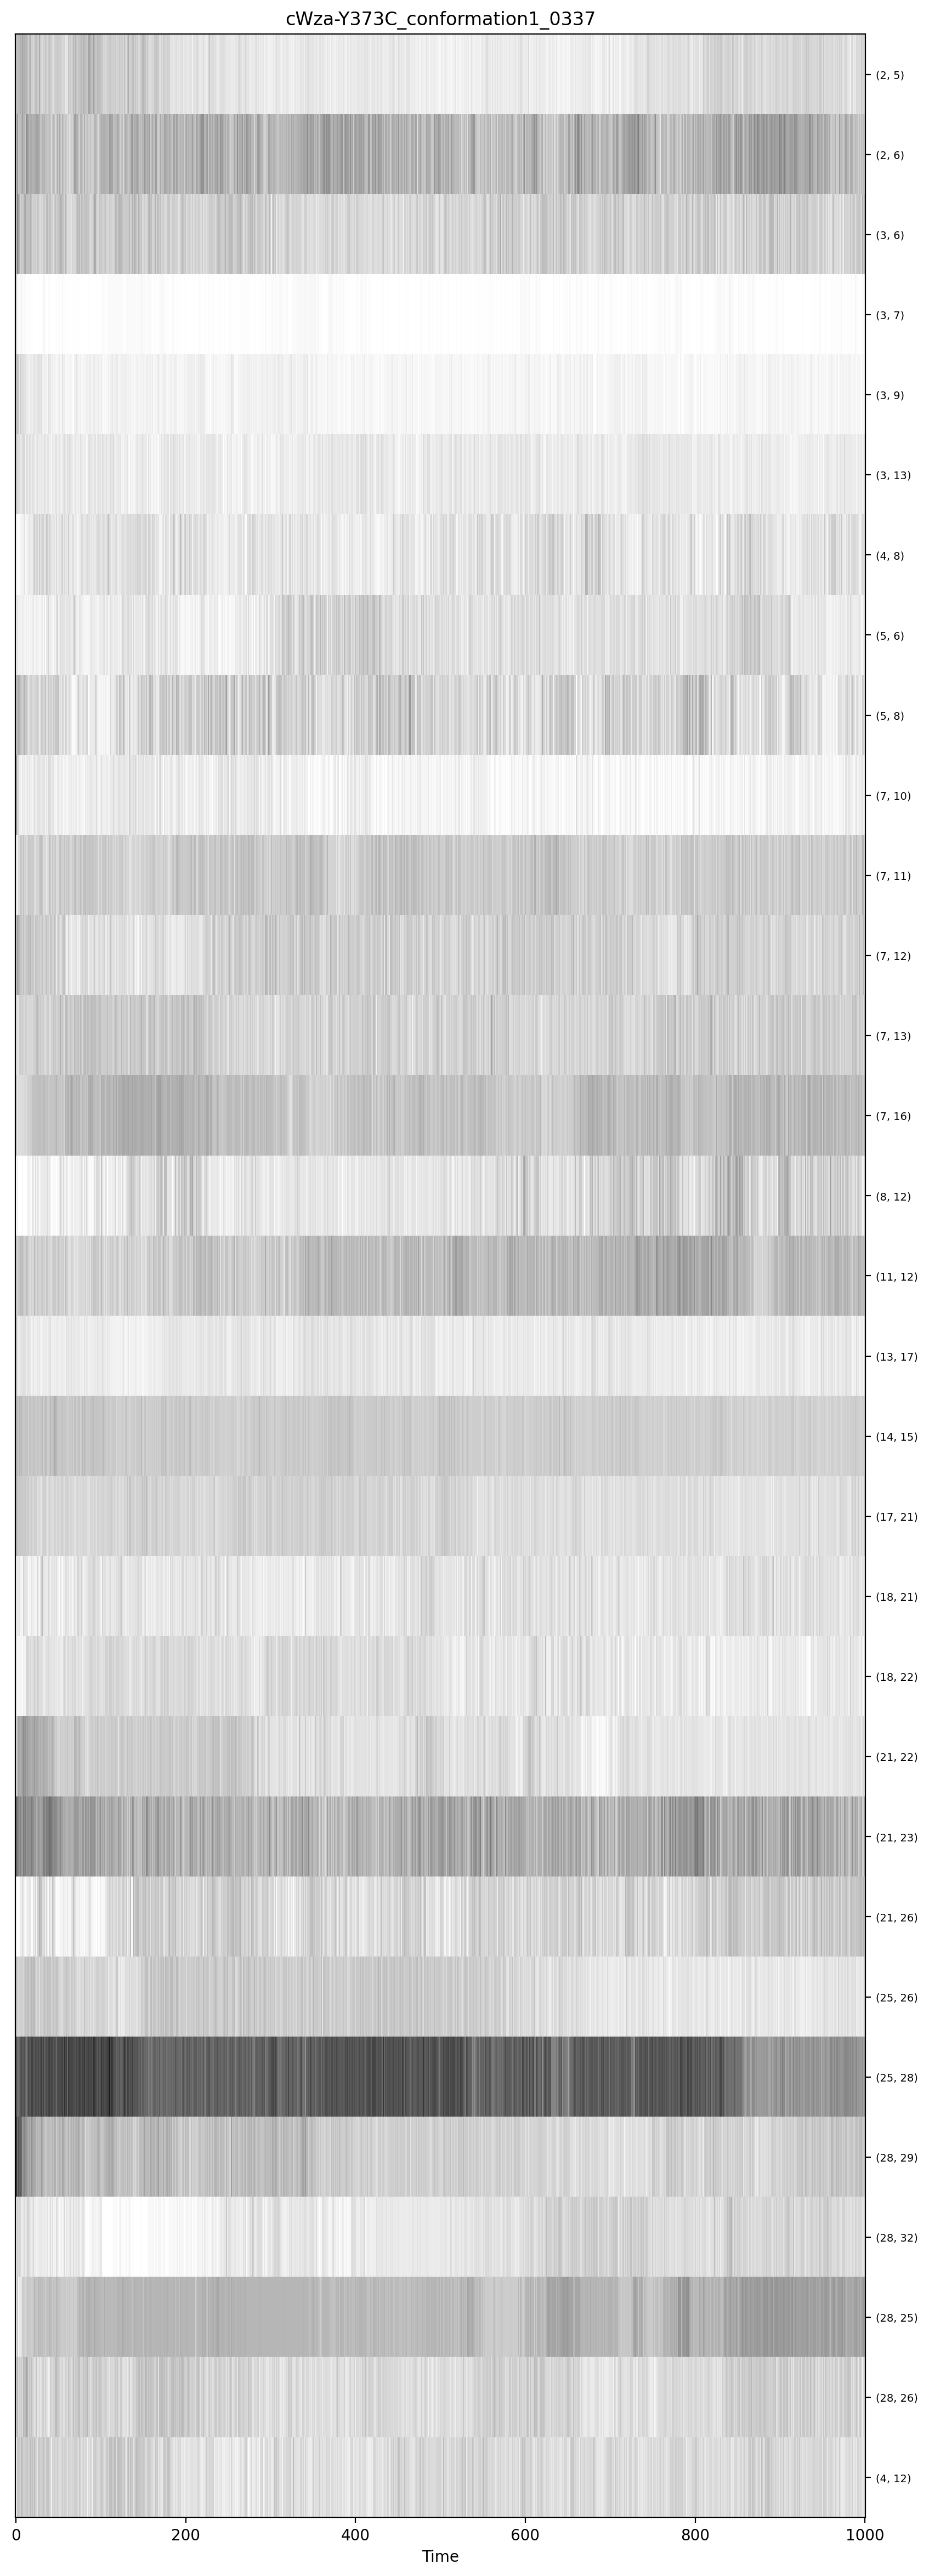

In [52]:
fig,ax = plt.subplots(1,1,figsize=(10,30),dpi=200)

X = contacts_leads
data_matrix = np.array(list(X.values()))

im = ax.imshow(data_matrix, 
               aspect="auto", 
               interpolation='nearest',
               cmap="binary")

contatcs_names = list(X.keys())
ax.set_yticks(range(len(contatcs_names)))
y_labels = contatcs_names
ax.set_yticklabels(y_labels,fontsize=7)
ax.yaxis.set_tick_params(labelright=True, right=True)
ax.yaxis.set_tick_params(labelleft=False, left=False)

ax.set_xlabel("Time")
ax.set_title(model_name)

plt.show()

## Dominant contacts: breakdown by model

**NOTE** Compute `df_trimmed` using any of the filters in the [Dominant contacts](#dominant_contacts) section.

Contacts filtered using mild filter.

In [20]:
from itertools import combinations

hydrophobic_residues = [
    'ALA',
    'ILE',
    'LEU',
    'MET',
    'PHE',
    'VAL',
    'PRO',
    'GLY',
    'TRP',
    'TYR'
]

from itertools import combinations
residue_combinations = list(combinations(hydrophobic_residues, 2)) +\
                       list(zip(hydrophobic_residues, hydrophobic_residues))

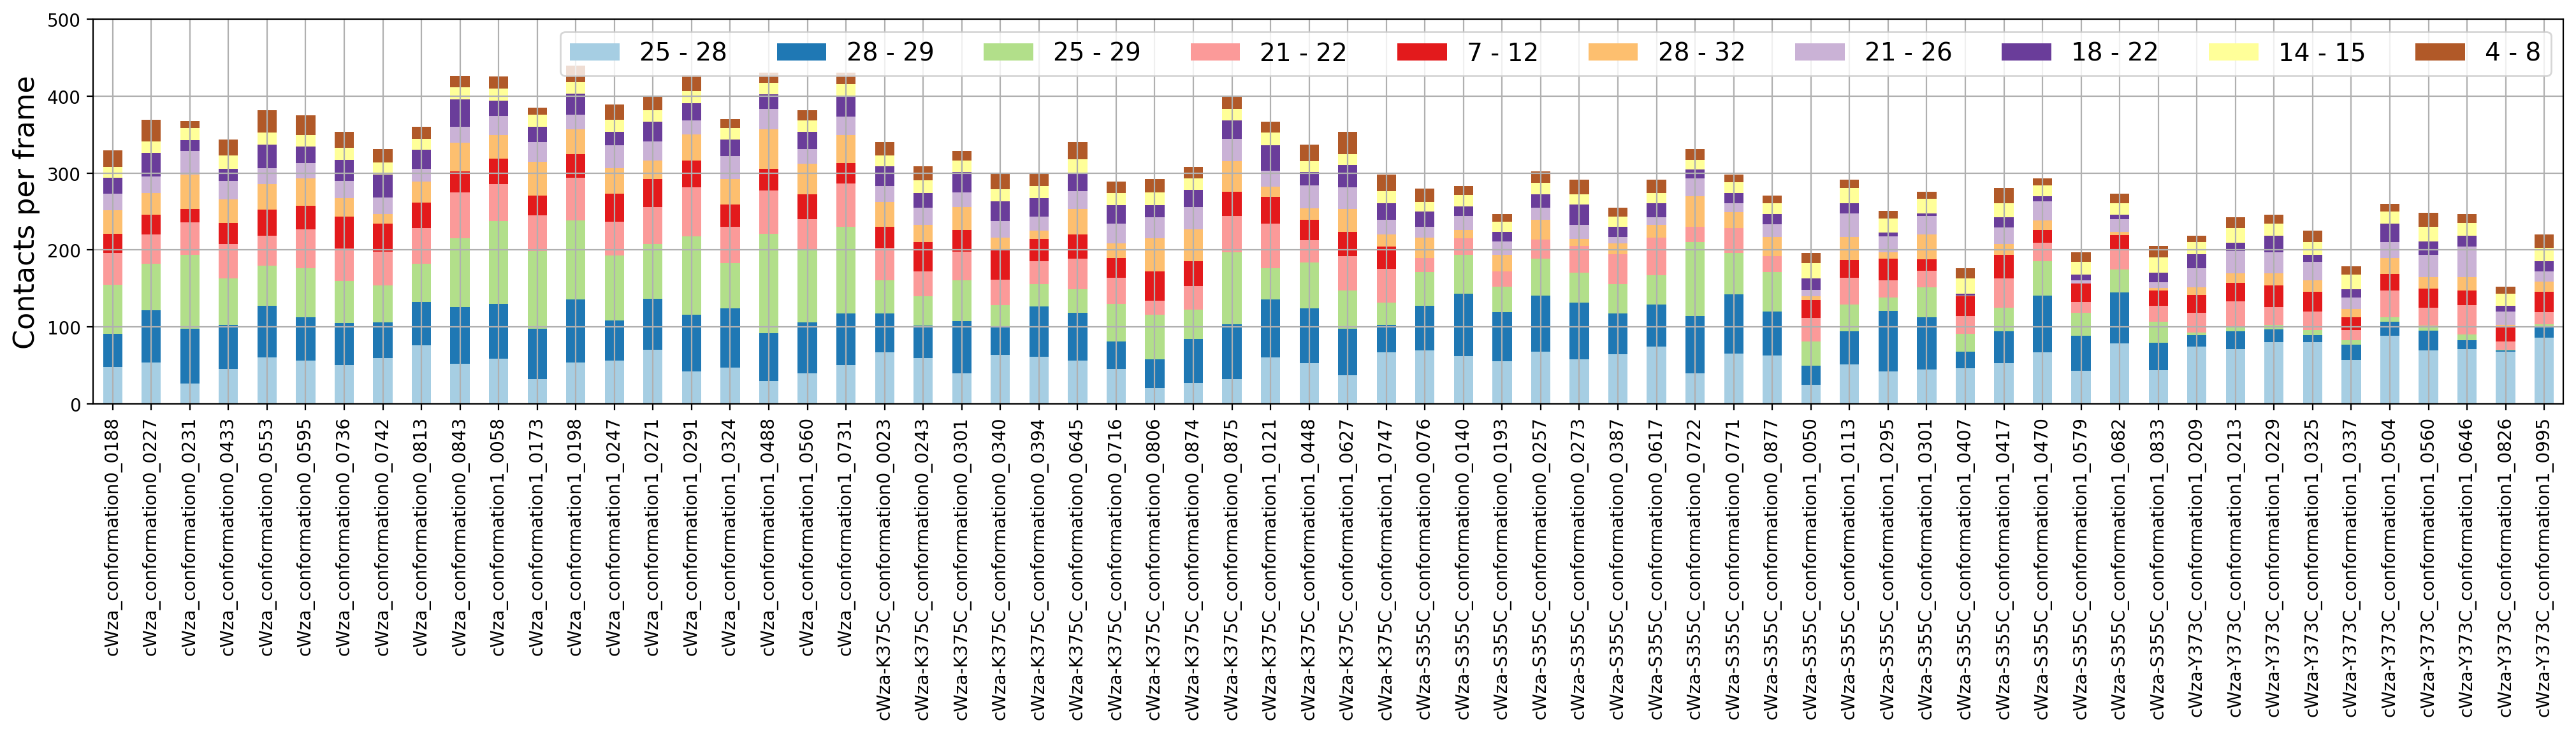

In [55]:
fig,ax = plt.subplots(1,1,figsize=(25,4),dpi=200)
df_trimmed.T.plot(kind='bar', stacked=True, colormap='Paired',ax=ax)

sequence = 'APLVRWNRVISQLVPTITGVHDLTETVRYIKTWPN'

labels = []
for x in list(df_trimmed.T.columns):
    resn_A = str(x[0])
    resn_B = str(x[1])
    y = resn_A+' - '+resn_B
    labels.append(y)

ax.legend(loc='upper right', 
          ncol=len(df_trimmed),
          labels=labels,
          fontsize=14)

ax.set_ylabel('Contacts per frame',fontsize=16)
ax.set_ylim(0,500)

ax.grid(True)

plt.show()

Save data into CSV file

In [49]:
import json

In [53]:
df_trimmed2 = pd.DataFrame(df_trimmed.values, 
                           columns = df_trimmed.columns,
                           index=[json.dumps(x) for x in list(df_trimmed.index)])

In [54]:
df_trimmed2.to_csv('data/df_md_dominant_contacts.csv', index_label=False)

# APPENDIX

## Script: `add_chain_numbers.py`

Script to add chain numbers to protein PDBs extracted from `md_100ns.gro` files

In [ ]:
%%writefile add_chain_numbers.py
from pymol import cmd
import sys

pdb_in = sys.argv[1] # Input PDB path
pdb_out = sys.argv[2] # Output PDB path

cmd.load(pdb_in,"MyProtein")
N_atoms = cmd.count_atoms("MyProtein")

Chains = ['A', 'B','C','D','E','F','G','H']

atoms_per_chain = N_atoms/len(Chains)

for k in range(len(Chains)):
    atom_number_intial = int( 1 + k*atoms_per_chain )
    atom_number_final  = int( (k + 1)*atoms_per_chain )
    selection = "id "+ str(atom_number_intial) + ":" + str(atom_number_final)
    expression = "chain='"+Chains[k]+"'"
    cmd.alter(selection, expression)

cmd.set("retain_order",1)
cmd.save(pdb_out ,"MyProtein")


Commands to fix all chains in all models using a Python script

```bash
for pdb in `ls md_selected_models/*md_100ns.pdb`; do 
    pymol -qc ../add_chain_numbers.py -- $pdb ${pdb%.pdb}_FIXED-CHAINS.pdb; 
done
```

## Script: Overlay conformation states

Simple Python script to overlay docking, MD, and wild-type Wza-D4 models

```python
from pymol import cmd
import sys

pdb1 = sys.argv[1] # PDB docking model
pdb2 = sys.argv[2] # PDB md_100ns model
wza_pdb = "data/md_selected_models/wzaD4-consensus-full.pdb"

cmd.load(pdb1,"docking")
cmd.load(pdb2,"md_100ns")
cmd.load(wza_pdb,"wza")

cmd.align("docking", "wza")
cmd.align("md_100ns", "wza")

cmd.hide("spheres","all")
cmd.show("cartoon","all")
cmd.show("sticks",'resname tyr+cys')
cmd.set("orthoscopic",1)
cmd.bg_color('white')
```